# <center> **Stock Price Prediction** </center>

## Utilize Machine Learning techniques to estimate the stock value using the Regression Algorithms. 

### Import Dependencies Library.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Analysis.

In [44]:
df=pd.read_csv("TCS.csv")

In [45]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0


In [46]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1661,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,3871.300049,2320754.0
1662,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,3836.949951,1673362.0
1663,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,3779.149902,2253075.0
1664,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,3791.899902,2489161.0
1665,2021-09-30,3805.000000,3805.000000,3750.100098,3775.550049,3775.550049,2252412.0


In [47]:
df.shape

(1666, 7)

In [48]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03
mean,1826.027599,1845.240901,1805.624554,1825.226400,1733.238404,2.871305e+06
std,679.259927,686.315197,672.102864,678.990594,714.701808,2.752632e+06
min,1058.449951,1070.000000,1025.949951,1050.574951,955.857666,8.682200e+04
25%,1255.912476,1265.000000,1243.000000,1254.787536,1129.899963,1.738917e+06
50%,1725.000000,1750.000000,1702.000000,1725.625000,1619.241089,2.404448e+06
75%,2168.974976,2189.700074,2146.075074,2165.025024,2079.880738,3.328333e+06
max,3930.000000,3981.750000,3892.100098,3954.550049,3954.550049,8.806715e+07


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1666 non-null   object 
 1   Open       1663 non-null   float64
 2   High       1663 non-null   float64
 3   Low        1663 non-null   float64
 4   Close      1663 non-null   float64
 5   Adj Close  1663 non-null   float64
 6   Volume     1663 non-null   float64
dtypes: float64(6), object(1)
memory usage: 91.2+ KB


df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)
df.dropna(inplace=True)

In [50]:
df.nunique()

Date         1666
Open         1307
High         1470
Low          1499
Close        1610
Adj Close    1655
Volume       1663
dtype: int64

In [51]:
df.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data and Information Visualization.

In [54]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,1283.500000,1283.500000,1270.500000,1272.775024,1114.909302,366830.0
1,2015-01-02,1275.500000,1295.474976,1275.300049,1289.724976,1129.757202,925740.0
2,2015-01-05,1290.500000,1299.949951,1262.324951,1270.125000,1112.587769,1754242.0
3,2015-01-06,1264.550049,1264.550049,1220.000000,1223.300049,1071.570801,2423784.0
4,2015-01-07,1235.000000,1239.574951,1203.724976,1208.849976,1058.912842,2636332.0


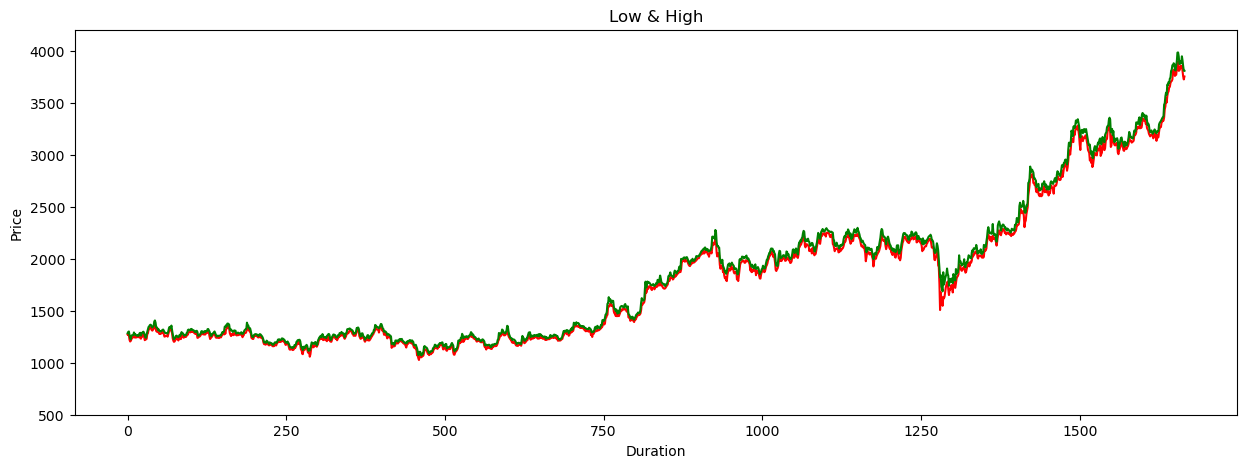

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(df['Low'],color="r")
plt.plot(df['High'],color="g")
plt.ylim(500,4200)

plt.title("Low & High")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

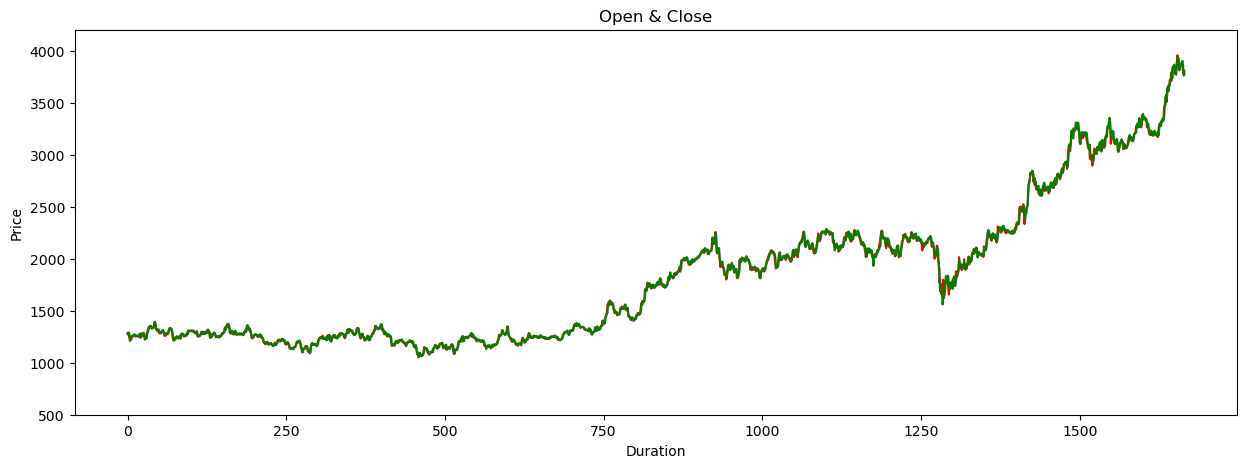

In [56]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'],color="r")
plt.plot(df['Open'],color="g")
plt.ylim(500,4200)

plt.title("Open & Close")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

## RandomForestRegressor Algo.

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
regressor=RandomForestRegressor(n_estimators=100)

##### Extract the features(X) & target(Y) variable.

In [59]:
X=df.drop(['Close','Date'],axis=1)
Y=df["Close"]

##### Split data into train & test.

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)

In [61]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
y_pred=regressor.predict(x_test)

In [63]:
y_pred[0:5]

array([3225.34752205, 3152.76648187, 3122.01348138, 3197.0700049 ,
       3197.96899657])

In [64]:
y_test.head()

1499    3196.550049
1500    3111.350098
1501    3139.350098
1502    3203.449951
1503    3200.050049
Name: Close, dtype: float64

##### Evaluate the model performance(error_score).

In [65]:
from sklearn import metrics

In [66]:
from sklearn.metrics import mean_squared_error,r2_score


In [67]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("r2:", r2)
print('MSE:', mse)
print('RMSE:', rmse)

r2: 0.3190702802962354
MSE: 45041.64129090864
RMSE: 212.2301611244468


##### Actual and Predicated Visualization.

In [68]:
y_test=list(y_test)

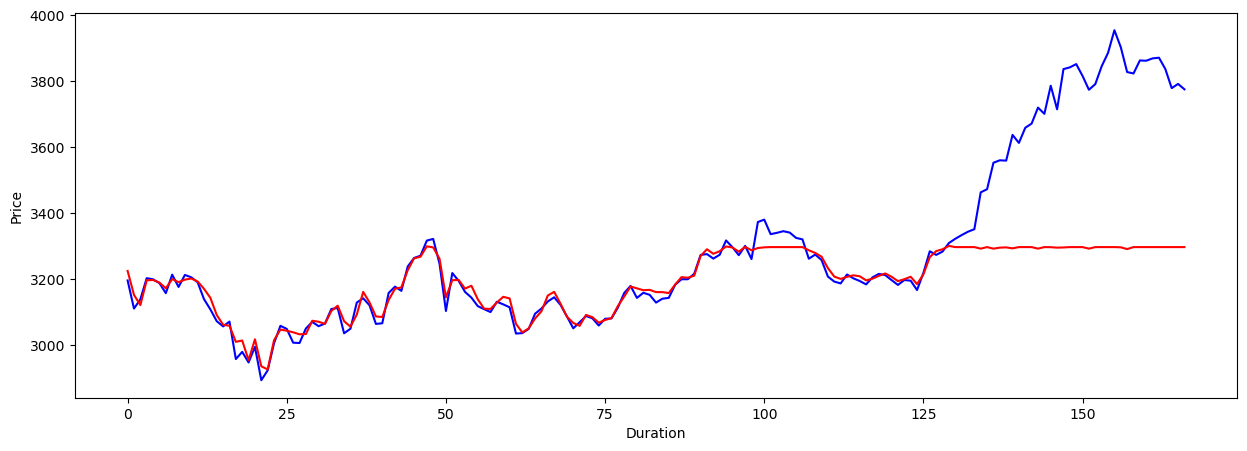

In [69]:
plt.figure(figsize=(15, 5))
plt.plot(y_test,color='blue',label="Actual")
plt.plot(y_pred,color='red',label="Predict")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

## LinearRegression Algo.

In [70]:
from sklearn.linear_model import LinearRegression

##### Extract the features(X) & target(Y) variable.

In [71]:
#X=df[['Open', 'High', 'Low', 'Volume']]
X=df.drop(['Close','Date'],axis=1)
Y=df['Close']

##### Split data into train & test.

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=False)

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred=model.predict(x_test)

In [76]:
y_test[0:5]

1332    2046.150024
1333    2091.550049
1334    2048.250000
1335    2071.750000
1336    2072.050049
Name: Close, dtype: float64

In [77]:
y_pred[0:5]

array([2046.43038408, 2096.00438768, 2064.69255167, 2086.48813469,
       2092.51570204])

##### Evaluate the model performance(error_score).

In [78]:
from sklearn import metrics

In [79]:
from sklearn.metrics import mean_squared_error,r2_score

In [80]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("r2:", r2)
print('MSE:', mse)
print('RMSE:', rmse)

r2: 0.9988914672525497
MSE: 261.3601615232374
RMSE: 16.166637297942867


In [81]:
y_test=list(y_test)

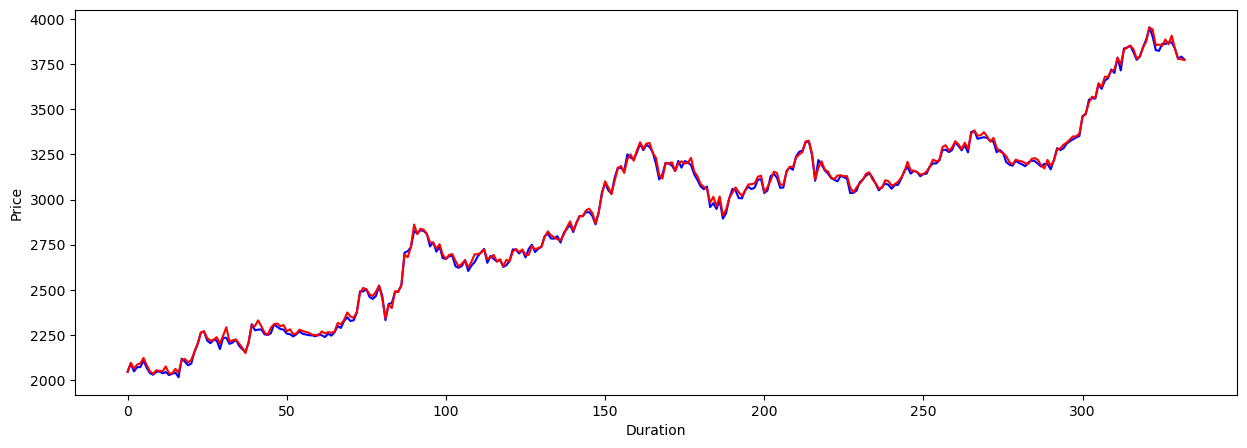

In [82]:
plt.figure(figsize=(15, 5))
plt.plot(y_test,color='blue',label="Actual")
plt.plot(y_pred,color='red',label="Predict")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()